# Logistic Regression Model 

## Dataset Preprocessing and Setup

In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [188]:
# Load and prepare the data
df = pd.read_csv('D:/final_data.csv')
df['value_category'] = pd.cut(df['current_value'], bins=[-1, 300000, 3000000, df['current_value'].max()],
                              labels=['low', 'medium', 'high'])

X = df.drop(columns=['current_value', 'value_category', 'player', 'team', 'name', 'position'])
y = df['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


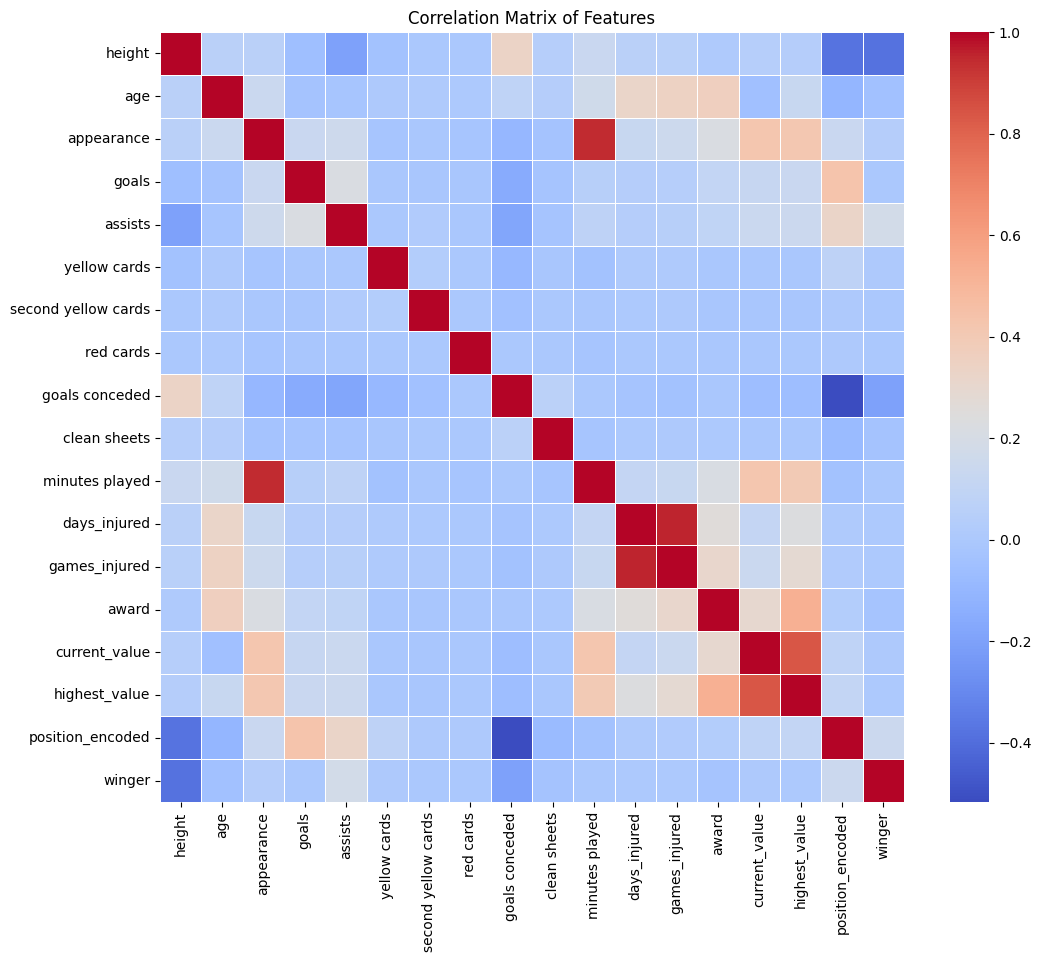

In [189]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


### Feature Selection for Kmeans model

In [190]:
df = df[['age', 'appearance', 'goals']]

In [191]:
df.head(2)

,age,appearance,goals
0,32.0,104,0.0
1,30.0,15,0.0


In [192]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [193]:
X.shape

(10754, 3)

### Building the model

In [194]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


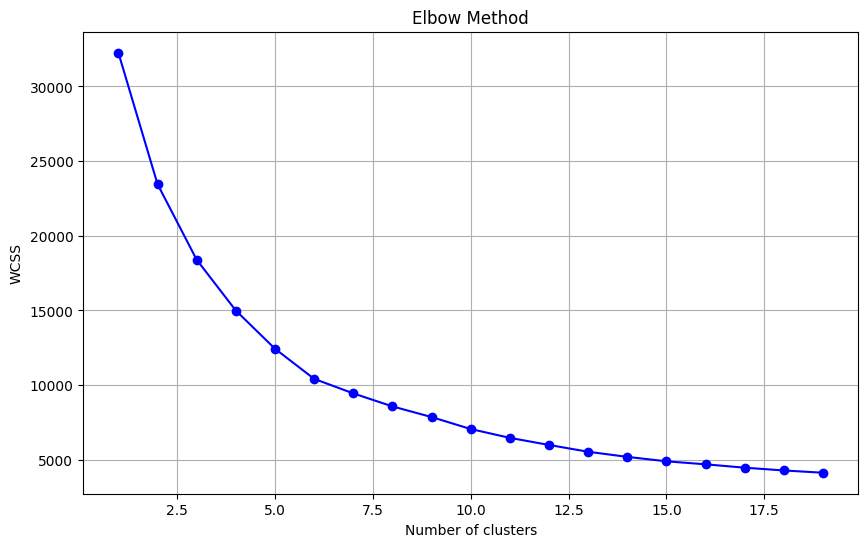

In [195]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [196]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

### Train and Test the Model

In [209]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

predicted_labels = ['low' if pred == 0 else 'medium' if pred == 1 else 'high' for pred in y]
predicted_labels

['high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 

### Evaluating the Model

In [198]:
X.head(2)

,age,appearance,goals
0,32.0,104,0.0
1,30.0,15,0.0


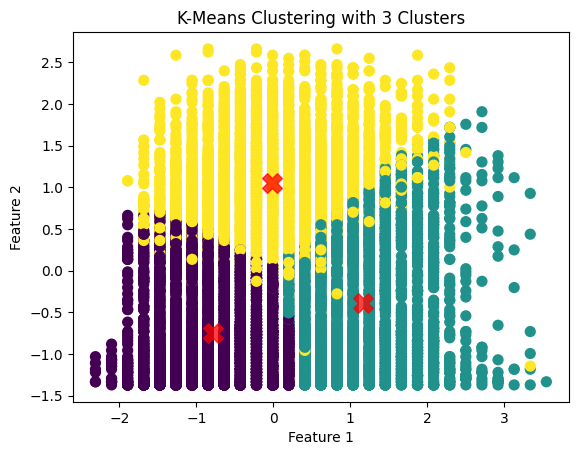

In [199]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [200]:
X['kmeans'] = y_pred

In [201]:
X['kmeans'].value_counts()

kmeans
0    4060
2    3921
1    2773
Name: count, dtype: int64

In [202]:
X[X['kmeans']==0]

,age,appearance,goals,kmeans
8,21.0,34,0.000000,0
11,22.0,34,0.000000,0
19,26.0,31,0.155575,0
20,20.0,39,0.129125,0
21,18.0,51,0.153759,0
...,...,...,...,...
10749,20.0,16,0.175953,0
10750,24.0,26,0.372671,0
10751,19.0,20,0.375000,0
10752,20.0,17,0.312139,0


<Axes: xlabel='goals', ylabel='age'>

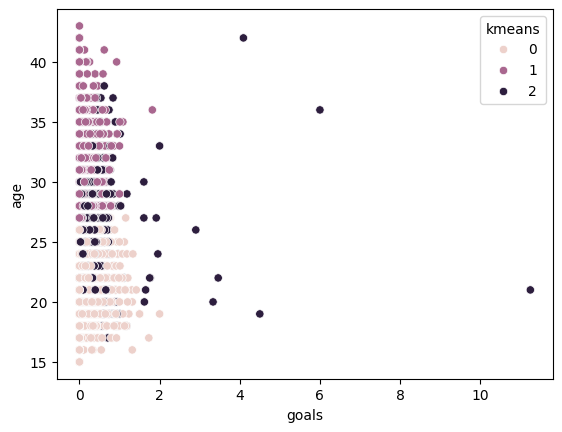

In [203]:
sns.scatterplot(data = X , x = 'goals', y = 'age', hue = 'kmeans')

<Axes: xlabel='age', ylabel='appearance'>

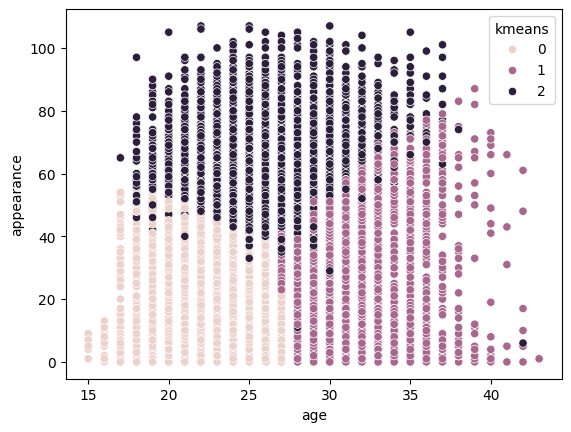

In [204]:
sns.scatterplot(data = X , x = 'age', y = 'appearance', hue = 'kmeans')

In [205]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='age', y='appearance', z='goals',
              color='kmeans')
fig.show()

In [206]:
import joblib
joblib.dump(model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']